In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import math

In [3]:
def multivariate_normal(mean1, mean2, std1, std2, rho, n):
  means = np.array([mean1, mean2])
  covs = np.array([
    [std1 ** 2, std1 * std2 * rho],
    [std1 * std2 * rho, std2 ** 2],
  ])
  return np.random.default_rng().multivariate_normal(means, covs, n).T

In [4]:
ns = np.array([20, 60, 100])
rhos = np.array([0, 0.5, 0.9])

for n in ns:
  for rho in rhos:
    pearson_coefs = np.array([])
    spearman_coefs = np.array([])
    quadrant_coefs = np.array([])

    for i in range(1000):
      x, y = multivariate_normal(0, 0, 1, 1, rho, n)
      pearson_coef = pearsonr(x, y)[0]
      spearman_coef = spearmanr(x, y)[0]
      quadrant_coef = math.sqrt(2) * np.mean(np.sign(x - np.median(x)) * np.sign(y - np.median(y)))

      pearson_coefs = np.append(pearson_coefs, pearson_coef)
      spearman_coefs = np.append(spearman_coefs, spearman_coef)
      quadrant_coefs = np.append(quadrant_coefs, quadrant_coef)

    print(f'\nSample size: {n}, Correlation coefficient (rho): {rho}')
    print('Pearson coefficients: Mean =', np.mean(pearson_coefs), 'Mean of squares =', np.mean(pearson_coefs ** 2), 'Variance =', np.var(pearson_coefs))
    print('Spearman coefficients: Mean =', np.mean(spearman_coefs), 'Mean of squares =', np.mean(spearman_coefs ** 2), 'Variance =', np.var(spearman_coefs))
    print('Quadrant coefficients: Mean =', np.mean(quadrant_coefs), 'Mean of squares =', np.mean(quadrant_coefs ** 2), 'Variance =', np.var(quadrant_coefs))



Sample size: 20, Correlation coefficient (rho): 0.0
Pearson coefficients: Mean = 0.005396221599700266 Mean of squares = 0.05078657905585523 Variance = 0.05075745984830216
Spearman coefficients: Mean = 0.004168421052631577 Mean of squares = 0.05151834925660014 Variance = 0.051500973522528116
Quadrant coefficients: Mean = -0.008485281374238571 Mean of squares = 0.10784000000000003 Variance = 0.10776800000000003

Sample size: 20, Correlation coefficient (rho): 0.5
Pearson coefficients: Mean = 0.4962660137441809 Mean of squares = 0.2762222115018852 Variance = 0.029942255104345627
Spearman coefficients: Mean = 0.4679203007518797 Mean of squares = 0.25279777714964097 Variance = 0.03384836929391146
Quadrant coefficients: Mean = 0.4723473298326138 Mean of squares = 0.31584 Variance = 0.092728

Sample size: 20, Correlation coefficient (rho): 0.9
Pearson coefficients: Mean = 0.8961075426398004 Mean of squares = 0.8055252366854844 Variance = 0.0025165087095428184
Spearman coefficients: Mean = 0.

In [5]:
for n in ns:
  pearson_coefs = np.array([])
  spearman_coefs = np.array([])
  quadrant_coefs = np.array([])

  for i in range(1000):
    x, y = multivariate_normal(0, 0, 1, 1, 0.9, n) * 0.9 + multivariate_normal(0, 0, 10, 10, -0.9, n) * 0.1
    pearson_coef = pearsonr(x, y)[0]
    spearman_coef = spearmanr(x, y)[0]
    quadrant_coef = math.sqrt(2) * np.mean(np.sign(x - np.median(x)) * np.sign(y - np.median(y)))

    pearson_coefs = np.append(pearson_coefs, pearson_coef)
    spearman_coefs = np.append(spearman_coefs, spearman_coef)
    quadrant_coefs = np.append(quadrant_coefs, quadrant_coef)

  print(f'\nSample size: {n}')
  print('Pearson coefficients: Mean =', np.mean(pearson_coefs), 'Mean of squares =', np.mean(pearson_coefs ** 2), 'Variance =', np.var(pearson_coefs))
  print('Spearman coefficients: Mean =', np.mean(spearman_coefs), 'Mean of squares =', np.mean(spearman_coefs ** 2), 'Variance =', np.var(spearman_coefs))
  print('Quadrant coefficients: Mean =', np.mean(quadrant_coefs), 'Mean of squares =', np.mean(quadrant_coefs ** 2), 'Variance =', np.var(quadrant_coefs))


Sample size: 20
Pearson coefficients: Mean = -0.08969061496244458 Mean of squares = 0.05562247457047569 Variance = 0.0475780681581342
Spearman coefficients: Mean = -0.07904812030075187 Mean of squares = 0.05381840691955452 Variance = 0.04756980159647237
Quadrant coefficients: Mean = -0.07184204896855324 Mean of squares = 0.10736000000000004 Variance = 0.10219872000000006

Sample size: 60
Pearson coefficients: Mean = -0.08975320285632293 Mean of squares = 0.02598171948350533 Variance = 0.017926082060537078
Spearman coefficients: Mean = -0.08378021672686858 Mean of squares = 0.02434158828503581 Variance = 0.017322463570234738
Quadrant coefficients: Mean = -0.07985592582200077 Mean of squares = 0.03833777777777778 Variance = 0.03196080888888889

Sample size: 100
Pearson coefficients: Mean = -0.09605445758389496 Mean of squares = 0.019657696578585557 Variance = 0.010431237756849284
Spearman coefficients: Mean = -0.09180571257125712 Mean of squares = 0.018814872933269916 Variance = 0.01038

In [6]:
def add_confidence_ellipse(x, y, ax, std, **kwargs):
  cov = np.cov(x, y)
  pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
  ell_radius_x = np.sqrt(1 + pearson)
  ell_radius_y = np.sqrt(1 - pearson)
  ellipse = Ellipse(
    (0, 0),
    width=ell_radius_x * 2,
    height=ell_radius_y * 2,
    facecolor='none',
    **kwargs,
  )

  scale_x = np.sqrt(cov[0, 0]) * std
  mean_x = np.mean(x)

  scale_y = np.sqrt(cov[1, 1]) * std
  mean_y = np.mean(y)

  transf = transforms.Affine2D() \
      .rotate_deg(45) \
      .scale(scale_x, scale_y) \
      .translate(mean_x, mean_y)

  ellipse.set_transform(transf + ax.transData)
  return ax.add_patch(ellipse)

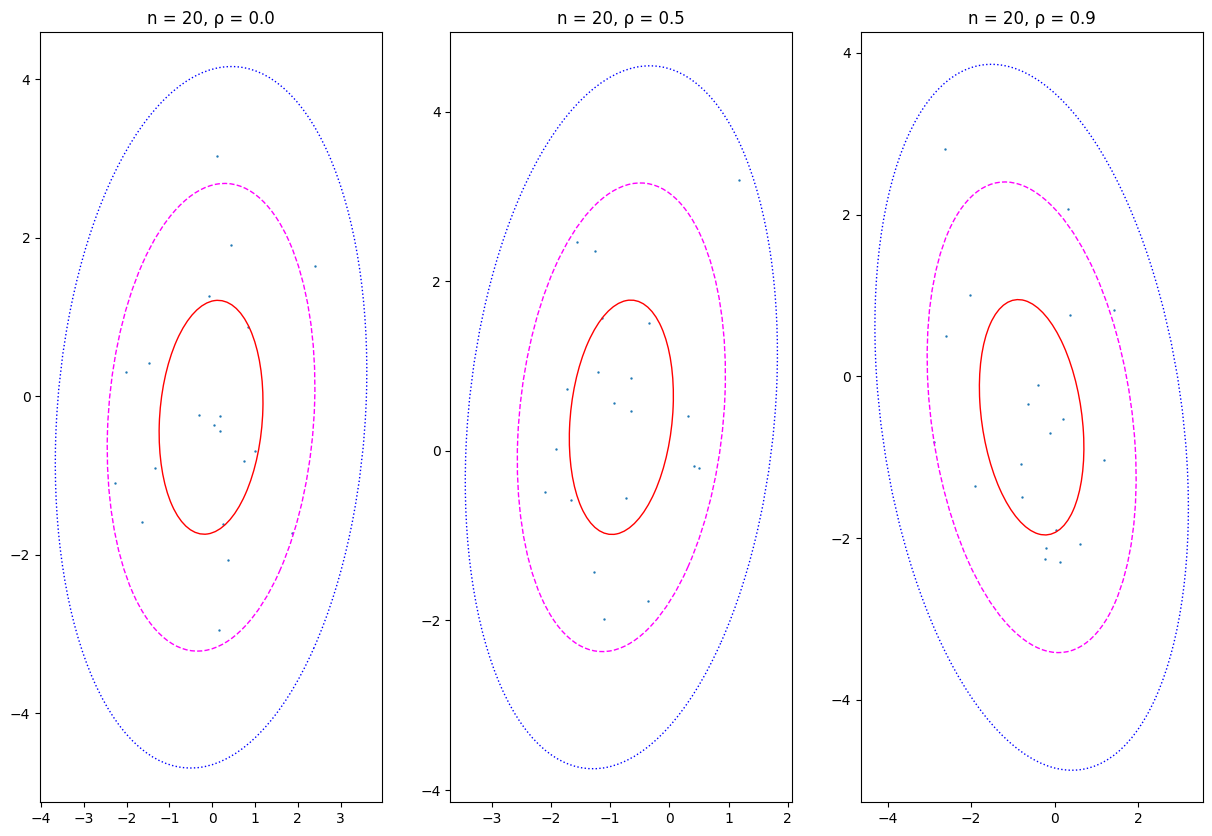

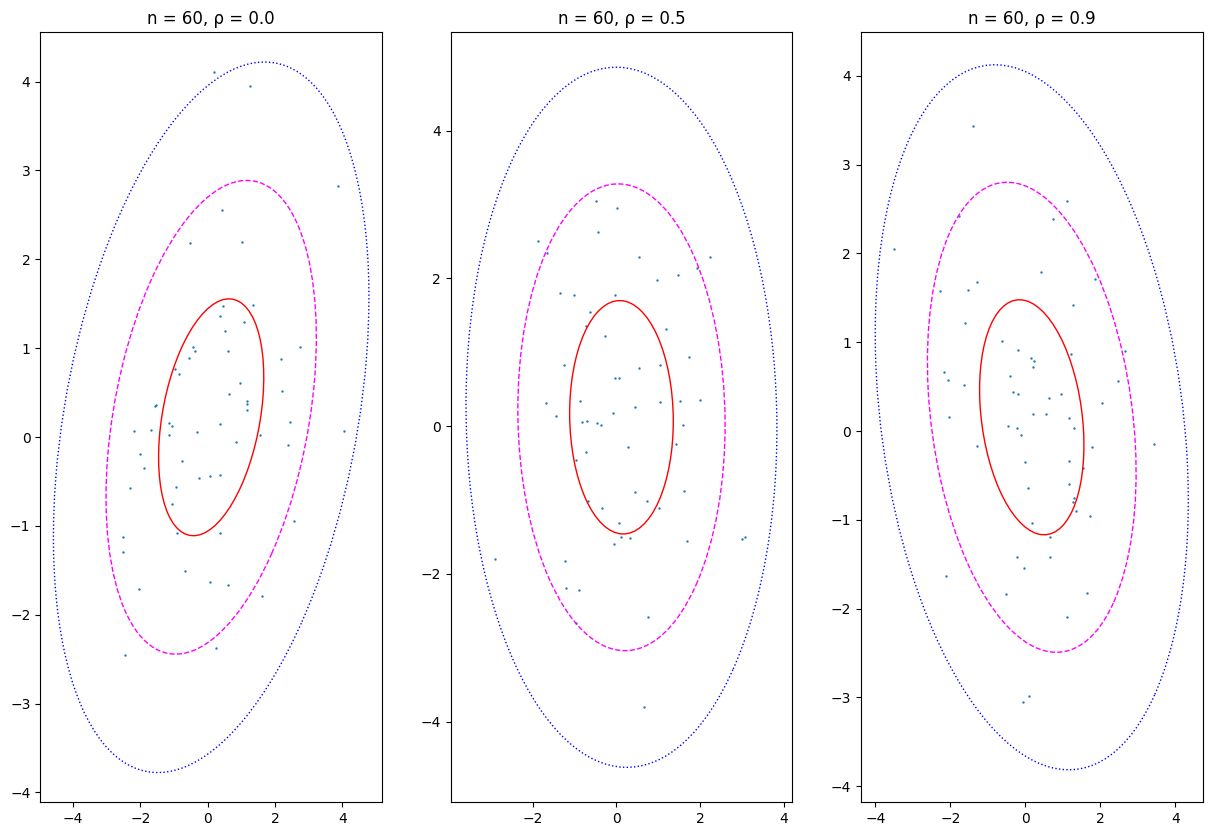

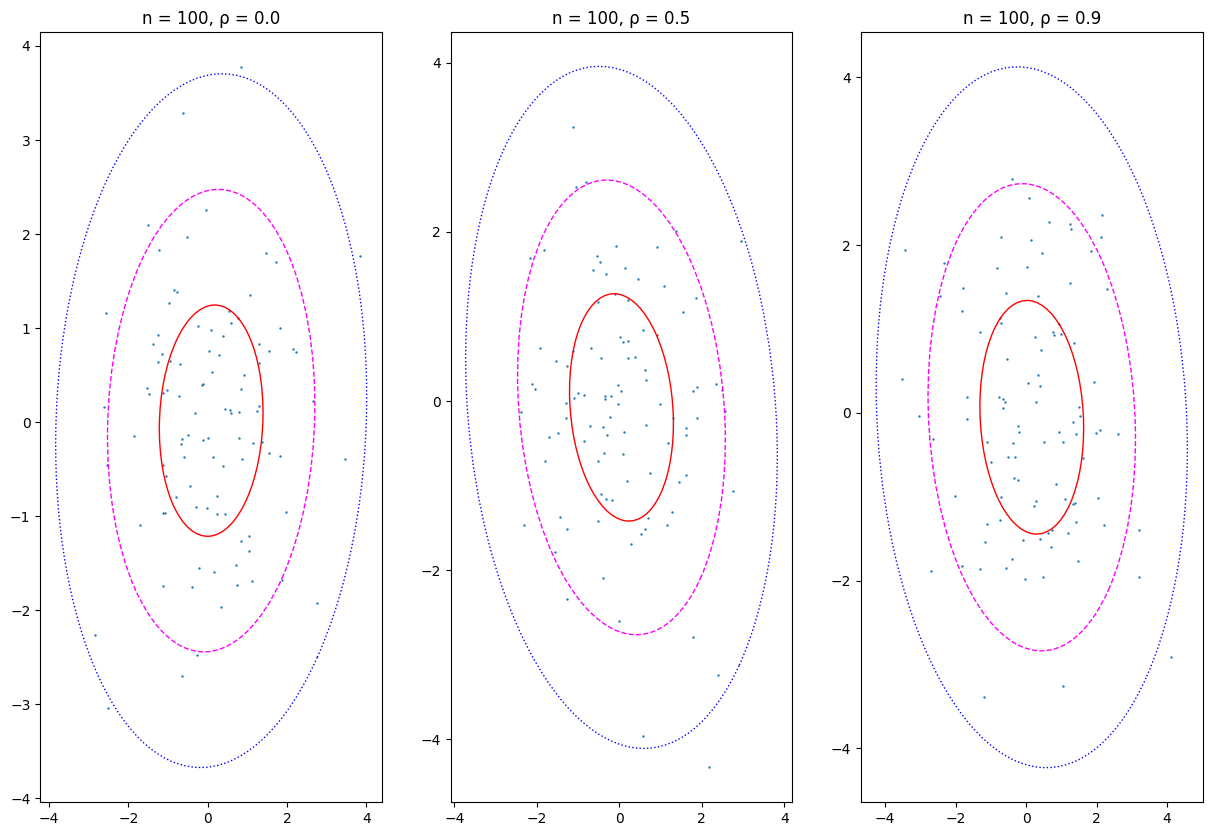

In [17]:
for n in ns:
  fig, axes = plt.subplots(1, 3, figsize=(15, 10))

  for index, rho in enumerate(rhos):
    x, y = multivariate_normal(0, 0, 1, 1, rho, n) * 0.9 + multivariate_normal(0, 0, 10, 10, -rho, n) * 0.1

    axis = axes[index]

    axis.scatter(x, y, s=0.5)

    add_confidence_ellipse(x, y, axis, 1, edgecolor='red')
    add_confidence_ellipse(x, y, axis, 2, edgecolor='fuchsia', linestyle='--')
    add_confidence_ellipse(x, y, axis, 3, edgecolor='blue', linestyle=':')

    axis.set_title(f'n = {n}, ρ = {rho}')

  plt.show()